## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  89.279157  1253.373736  0.730891  2.112642  1.531544
1  50.992890  1446.343908  0.154490  8.362790  1.366040
2  65.142556   245.180860  0.839054  6.578199  1.309251
3  17.339738  1224.557461  0.303349  4.373028  1.444856
4  54.199353  1736.101599  0.777965  1.700909  1.640173


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0724185	total: 59.3ms	remaining: 59.2s
1:	learn: 1.0624178	total: 60.4ms	remaining: 30.1s
2:	learn: 1.0508926	total: 62ms	remaining: 20.6s


3:	learn: 1.0410753	total: 65.6ms	remaining: 16.3s
4:	learn: 1.0327467	total: 66.5ms	remaining: 13.2s
5:	learn: 1.0232094	total: 67.2ms	remaining: 11.1s
6:	learn: 1.0154080	total: 67.5ms	remaining: 9.58s
7:	learn: 1.0049802	total: 68ms	remaining: 8.43s
8:	learn: 0.9958855	total: 68.5ms	remaining: 7.54s
9:	learn: 0.9862136	total: 69ms	remaining: 6.83s
10:	learn: 0.9745938	total: 69.3ms	remaining: 6.23s
11:	learn: 0.9653899	total: 69.9ms	remaining: 5.75s
12:	learn: 0.9549910	total: 70.5ms	remaining: 5.35s
13:	learn: 0.9458635	total: 71ms	remaining: 5s
14:	learn: 0.9360538	total: 71.6ms	remaining: 4.7s
15:	learn: 0.9269619	total: 72.1ms	remaining: 4.43s
16:	learn: 0.9173749	total: 72.5ms	remaining: 4.19s
17:	learn: 0.9088815	total: 73ms	remaining: 3.98s
18:	learn: 0.8997784	total: 73.7ms	remaining: 3.8s
19:	learn: 0.8897699	total: 74.3ms	remaining: 3.64s
20:	learn: 0.8802393	total: 74.7ms	remaining: 3.48s
21:	learn: 0.8711228	total: 75.3ms	remaining: 3.35s
22:	learn: 0.8630474	total: 75.7

210:	learn: 0.2231185	total: 160ms	remaining: 597ms
211:	learn: 0.2218280	total: 160ms	remaining: 596ms
212:	learn: 0.2204169	total: 161ms	remaining: 594ms
213:	learn: 0.2197056	total: 161ms	remaining: 592ms
214:	learn: 0.2184518	total: 162ms	remaining: 590ms
215:	learn: 0.2172283	total: 162ms	remaining: 588ms
216:	learn: 0.2162459	total: 162ms	remaining: 586ms
217:	learn: 0.2151798	total: 163ms	remaining: 584ms
218:	learn: 0.2141323	total: 163ms	remaining: 582ms
219:	learn: 0.2131713	total: 164ms	remaining: 580ms
220:	learn: 0.2121389	total: 164ms	remaining: 578ms
221:	learn: 0.2110875	total: 164ms	remaining: 576ms
222:	learn: 0.2101873	total: 165ms	remaining: 574ms
223:	learn: 0.2090600	total: 165ms	remaining: 572ms
224:	learn: 0.2083864	total: 166ms	remaining: 570ms
225:	learn: 0.2075007	total: 166ms	remaining: 568ms
226:	learn: 0.2065154	total: 166ms	remaining: 566ms
227:	learn: 0.2057563	total: 167ms	remaining: 564ms
228:	learn: 0.2047919	total: 167ms	remaining: 562ms
229:	learn: 

364:	learn: 0.1201891	total: 223ms	remaining: 387ms
365:	learn: 0.1197147	total: 223ms	remaining: 387ms
366:	learn: 0.1191868	total: 224ms	remaining: 386ms
367:	learn: 0.1186744	total: 224ms	remaining: 385ms
368:	learn: 0.1180972	total: 225ms	remaining: 384ms
369:	learn: 0.1176034	total: 225ms	remaining: 383ms
370:	learn: 0.1171425	total: 225ms	remaining: 382ms
371:	learn: 0.1168317	total: 226ms	remaining: 381ms
372:	learn: 0.1162732	total: 226ms	remaining: 380ms
373:	learn: 0.1158017	total: 227ms	remaining: 379ms
374:	learn: 0.1155004	total: 227ms	remaining: 379ms
375:	learn: 0.1149574	total: 227ms	remaining: 377ms
376:	learn: 0.1144261	total: 228ms	remaining: 376ms
377:	learn: 0.1141551	total: 228ms	remaining: 375ms
378:	learn: 0.1138839	total: 229ms	remaining: 375ms
379:	learn: 0.1136199	total: 229ms	remaining: 374ms
380:	learn: 0.1131043	total: 229ms	remaining: 373ms
381:	learn: 0.1125910	total: 230ms	remaining: 372ms
382:	learn: 0.1123362	total: 230ms	remaining: 371ms
383:	learn: 

590:	learn: 0.0625331	total: 321ms	remaining: 222ms
591:	learn: 0.0624110	total: 322ms	remaining: 222ms
592:	learn: 0.0622905	total: 322ms	remaining: 221ms
593:	learn: 0.0621886	total: 323ms	remaining: 221ms
594:	learn: 0.0620701	total: 323ms	remaining: 220ms
595:	learn: 0.0617992	total: 324ms	remaining: 219ms
596:	learn: 0.0614114	total: 324ms	remaining: 219ms
597:	learn: 0.0611146	total: 325ms	remaining: 218ms
598:	learn: 0.0607389	total: 325ms	remaining: 218ms
599:	learn: 0.0604987	total: 325ms	remaining: 217ms
600:	learn: 0.0602227	total: 326ms	remaining: 216ms
601:	learn: 0.0599521	total: 326ms	remaining: 216ms
602:	learn: 0.0595914	total: 327ms	remaining: 215ms
603:	learn: 0.0592401	total: 327ms	remaining: 214ms
604:	learn: 0.0590952	total: 327ms	remaining: 214ms
605:	learn: 0.0588651	total: 328ms	remaining: 213ms
606:	learn: 0.0586199	total: 328ms	remaining: 212ms
607:	learn: 0.0584790	total: 329ms	remaining: 212ms
608:	learn: 0.0582388	total: 329ms	remaining: 211ms
609:	learn: 

739:	learn: 0.0405900	total: 384ms	remaining: 135ms
740:	learn: 0.0404664	total: 385ms	remaining: 134ms
741:	learn: 0.0403128	total: 385ms	remaining: 134ms
742:	learn: 0.0401915	total: 386ms	remaining: 133ms
743:	learn: 0.0401272	total: 386ms	remaining: 133ms
744:	learn: 0.0400273	total: 387ms	remaining: 132ms
745:	learn: 0.0398785	total: 387ms	remaining: 132ms
746:	learn: 0.0398193	total: 388ms	remaining: 131ms
747:	learn: 0.0396484	total: 388ms	remaining: 131ms
748:	learn: 0.0394996	total: 388ms	remaining: 130ms
749:	learn: 0.0393551	total: 389ms	remaining: 130ms
750:	learn: 0.0392971	total: 389ms	remaining: 129ms
751:	learn: 0.0391802	total: 390ms	remaining: 128ms
752:	learn: 0.0391318	total: 390ms	remaining: 128ms
753:	learn: 0.0390747	total: 390ms	remaining: 127ms
754:	learn: 0.0389082	total: 391ms	remaining: 127ms
755:	learn: 0.0388098	total: 391ms	remaining: 126ms
756:	learn: 0.0387149	total: 391ms	remaining: 126ms
757:	learn: 0.0385512	total: 392ms	remaining: 125ms
758:	learn: 

918:	learn: 0.0255353	total: 483ms	remaining: 42.6ms
919:	learn: 0.0254328	total: 484ms	remaining: 42ms
920:	learn: 0.0253960	total: 485ms	remaining: 41.6ms
921:	learn: 0.0253404	total: 486ms	remaining: 41.1ms
922:	learn: 0.0252071	total: 486ms	remaining: 40.6ms
923:	learn: 0.0251605	total: 487ms	remaining: 40ms
924:	learn: 0.0251145	total: 487ms	remaining: 39.5ms
925:	learn: 0.0249849	total: 488ms	remaining: 39ms
926:	learn: 0.0249487	total: 488ms	remaining: 38.4ms
927:	learn: 0.0248943	total: 489ms	remaining: 38ms
928:	learn: 0.0248487	total: 490ms	remaining: 37.4ms
929:	learn: 0.0247226	total: 491ms	remaining: 36.9ms
930:	learn: 0.0246775	total: 491ms	remaining: 36.4ms
931:	learn: 0.0246419	total: 492ms	remaining: 35.9ms
932:	learn: 0.0245886	total: 492ms	remaining: 35.4ms
933:	learn: 0.0245440	total: 493ms	remaining: 34.8ms
934:	learn: 0.0244212	total: 493ms	remaining: 34.3ms
935:	learn: 0.0243771	total: 494ms	remaining: 33.8ms
936:	learn: 0.0243420	total: 495ms	remaining: 33.3ms
9

973:	learn: 0.0220587	total: 521ms	remaining: 13.9ms
974:	learn: 0.0219654	total: 522ms	remaining: 13.4ms
975:	learn: 0.0219316	total: 523ms	remaining: 12.8ms
976:	learn: 0.0218875	total: 523ms	remaining: 12.3ms
977:	learn: 0.0218431	total: 523ms	remaining: 11.8ms
978:	learn: 0.0217523	total: 524ms	remaining: 11.2ms
979:	learn: 0.0217188	total: 524ms	remaining: 10.7ms
980:	learn: 0.0216732	total: 525ms	remaining: 10.2ms
981:	learn: 0.0215849	total: 525ms	remaining: 9.63ms
982:	learn: 0.0215426	total: 526ms	remaining: 9.09ms
983:	learn: 0.0215093	total: 526ms	remaining: 8.56ms
984:	learn: 0.0214391	total: 527ms	remaining: 8.02ms
985:	learn: 0.0213987	total: 527ms	remaining: 7.48ms
986:	learn: 0.0213446	total: 528ms	remaining: 6.95ms
987:	learn: 0.0213031	total: 528ms	remaining: 6.41ms
988:	learn: 0.0212602	total: 528ms	remaining: 5.88ms
989:	learn: 0.0212148	total: 529ms	remaining: 5.34ms
990:	learn: 0.0211445	total: 529ms	remaining: 4.8ms
991:	learn: 0.0211039	total: 530ms	remaining: 4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2254827915035183


ABC Pre-generator MAE 0.22697586701423328


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

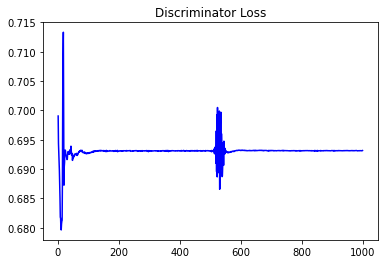

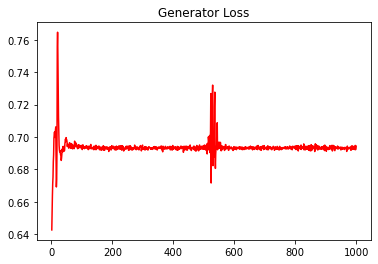

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.24952568155527116


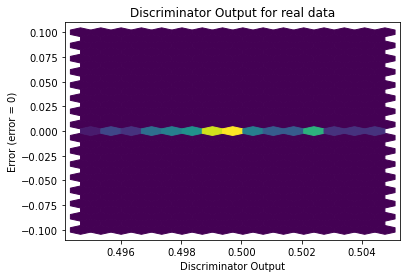

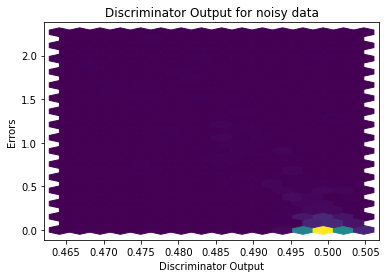

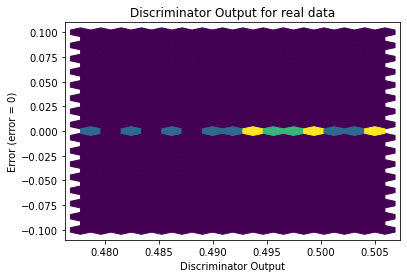

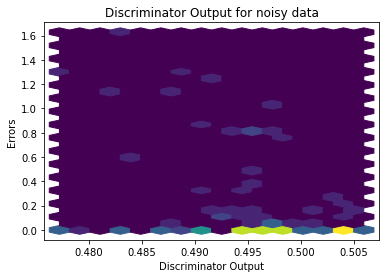

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

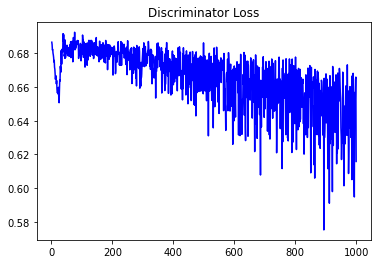

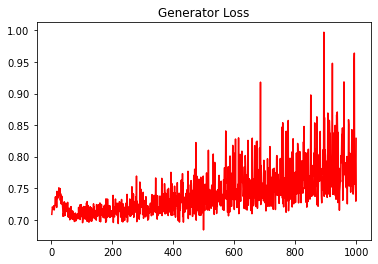

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5080080383252352


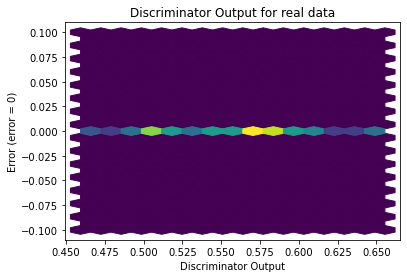

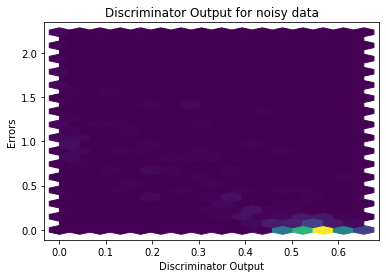

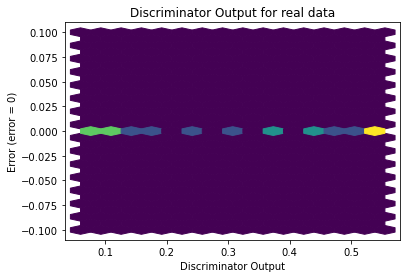

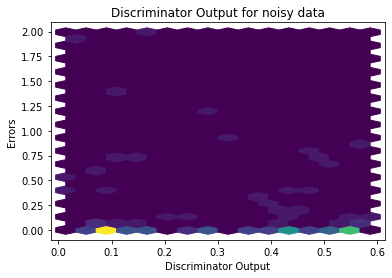

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


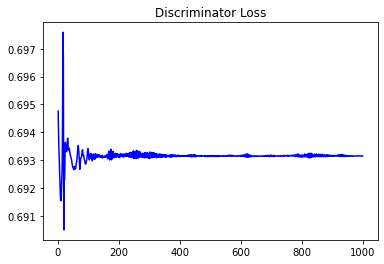

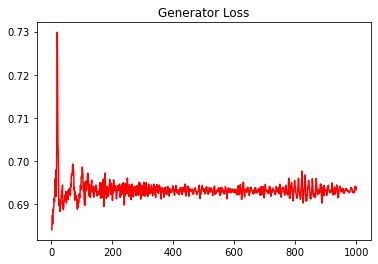

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.22455584764666855


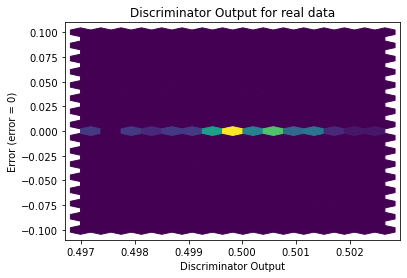

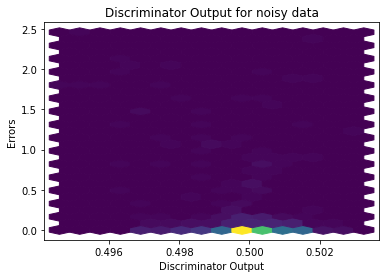

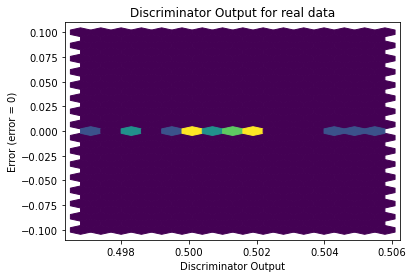

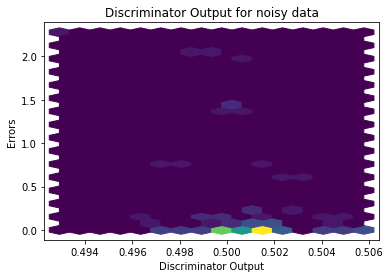

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


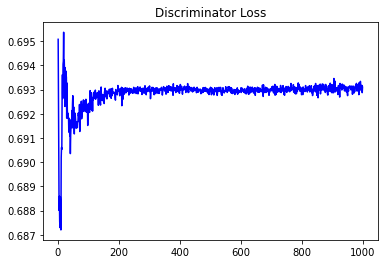

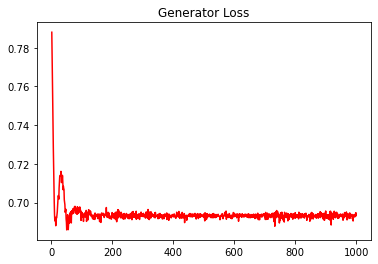

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.23451345561072232


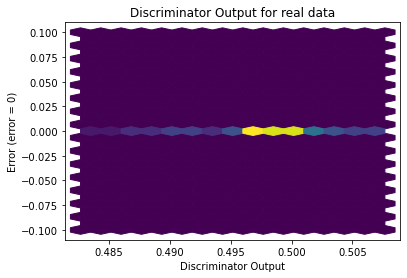

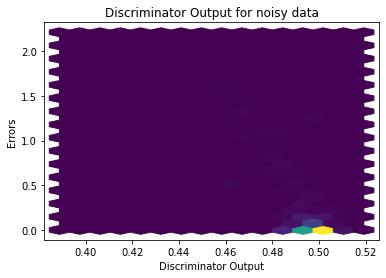

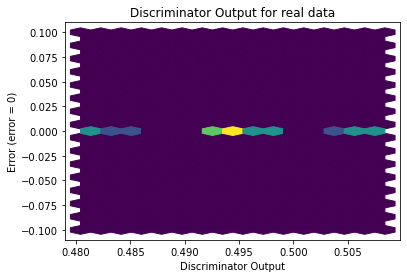

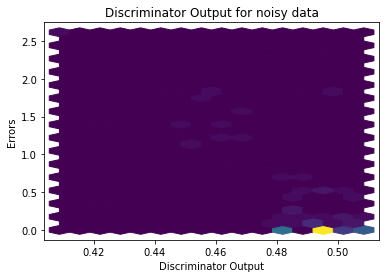

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0890]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0607]], requires_grad=True)
